In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg


In [2]:
def read_image(image_path):
    img = mpimg.imread(image_path)
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = img.mean(axis=2)
    return img

In [3]:
def apply_1d_filter(img, K, L):
    filter_size = K + L + 1
    filter_weights = np.ones(filter_size) / filter_size
    filtered_img = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1] - filter_size + 1):
            filtered_img[i, j + L] = np.sum(img[i, j:j + filter_size] * filter_weights)
            
    return filtered_img

In [4]:
def plot_images(img_list, titles):
    fig, axes = plt.subplots(1, len(img_list), figsize=(20, 10))
    for i, ax in enumerate(axes):
        ax.imshow(img_list[i], cmap='gray')
        ax.set_title(titles[i])
    plt.show()

In [6]:
image1 = read_image('high1.jpg')
image2 = read_image('high2.jpg')
image3 = read_image('low22.jpg')
image4 = read_image('low23.jpg')

In [13]:
K, L = 4, 4
filtered_image1 = apply_1d_filter(image1, K, L)
filtered_image2 = apply_1d_filter(image2, K, L)
filtered_image3 = apply_1d_filter(image3, K, L)
filtered_image4 = apply_1d_filter(image4, K, L)

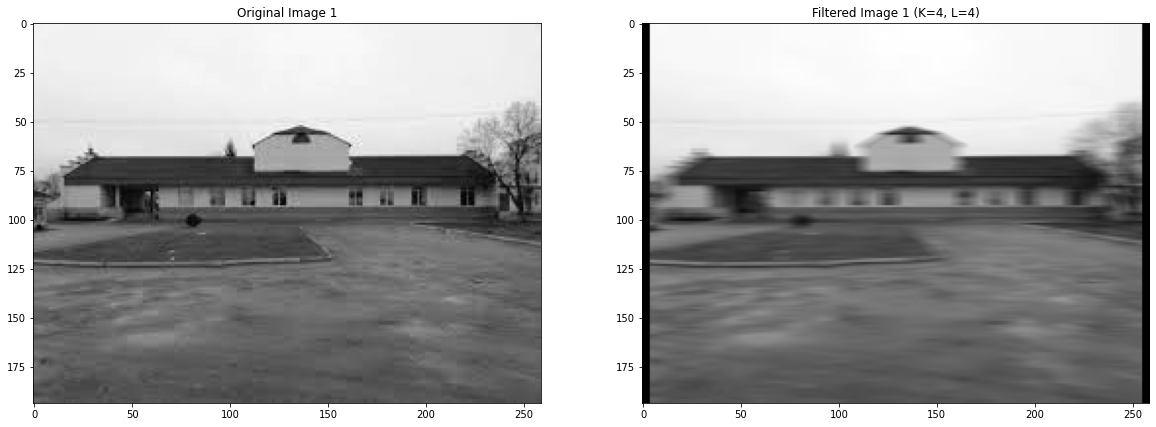

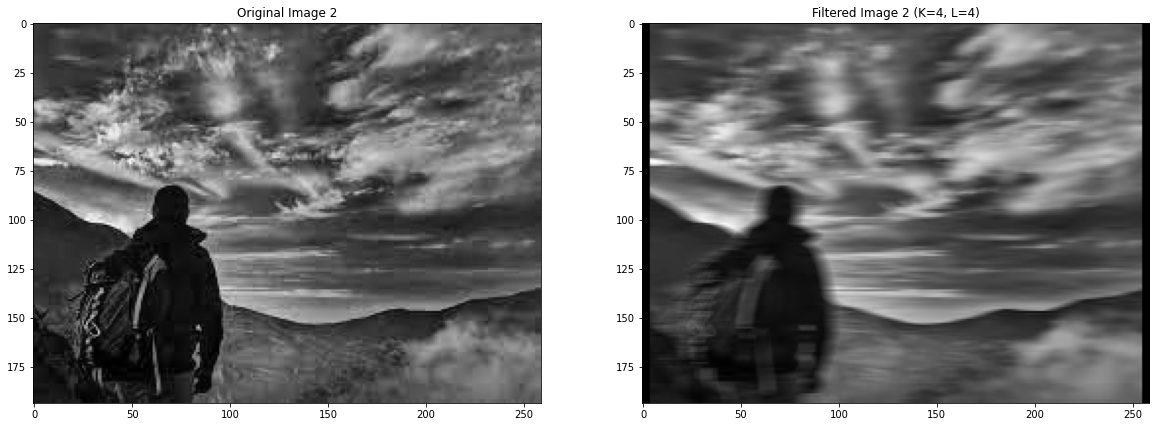

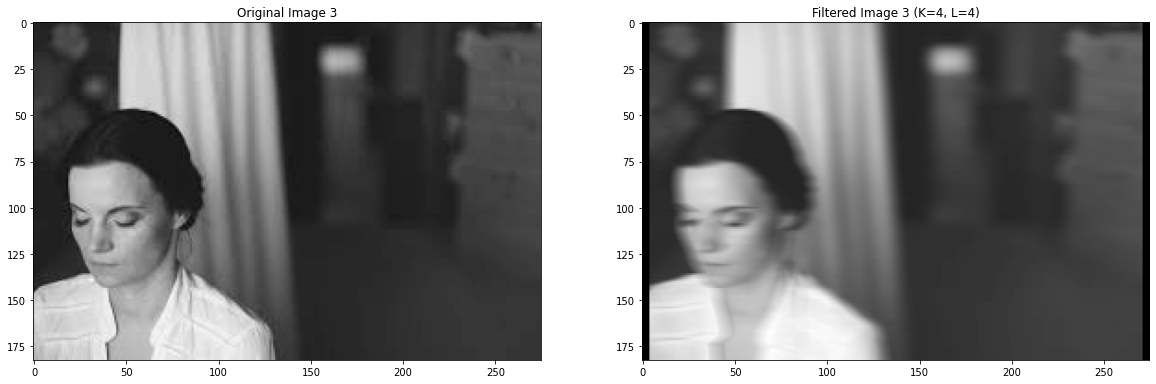

In [14]:
plot_images([image1, filtered_image1], ['Original Image 1', f'Filtered Image 1 (K={K}, L={L})'])
plot_images([image2, filtered_image2], ['Original Image 2', f'Filtered Image 2 (K={K}, L={L})'])
plot_images([image3, filtered_image3], ['Original Image 3', f'Filtered Image 3 (K={K}, L={L})'])